In [1]:
import aifc
import numpy
import matplotlib.pyplot as plt

file = 'data/train/'
audio_file = 'train{}.aiff'.format(32)

file_number = 5
if file_number <= 5:
    file = file.format('no_')
else:
    file = file.format('') 

f = aifc.open(file+audio_file, 'r')
nframes = f.getnframes()
strsig = f.readframes(nframes)
data = numpy.fromstring(strsig, numpy.short).byteswap()
# f.close()

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
nfft = 256  # Length of the windowing segments
fs = 2000
noverlap = 128
plt.title('Overlap = %d' % noverlap)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft), noverlap=noverlap)
plt.axis('off')
plt.subplot(1,2,2)
nfft = 256
fs = 2000
noverlap = 64
plt.title('Overlap = %d' % noverlap)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft), noverlap=noverlap)
plt.axis('off')

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
nfft = 256  # Length of the windowing segments
fs = 2
plt.title('Window %d' % nfft)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft))
plt.axis('off')
plt.subplot(1,2,2)
nfft = 128
fs = 2
plt.title('Window %d' % nfft)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft), noverlap=nfft/2)
plt.axis('off')

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


(16.0, 1968.0, 0.0, 1.0)

In [2]:
def get_spec(plt , save_name):
    nfft = 256  # Length of the windowing segments
    fs = 2
    pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, noverlap=128)
    plt.axis('off')
    plt.savefig(save_name,
                dpi=100,  # Dots per inch
                frameon='false',
                aspect='normal',
                bbox_inches='tight',
                pad_inches=0)  # Spectrogram saved as a .png


In [3]:
f.getnchannels(), f.getsampwidth(), f.getframerate(), f.getnframes(), f.getcomptype(), f.getmarkers()

(1, 2, 2000, 4000, b'NONE', None)

In [4]:
f.getparams()

_aifc_params(nchannels=1, sampwidth=2, framerate=2000, nframes=4000, comptype=b'NONE', compname=b'not compressed')

(128, 87)


(0.0, 11025.0)

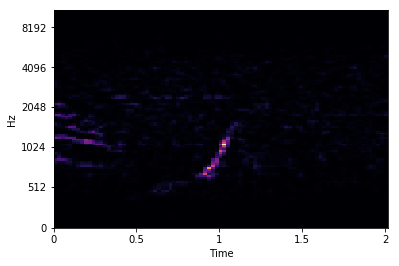

In [5]:
import librosa
import librosa.display

y, sr = librosa.load(file + audio_file, duration=196)
ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
# ps = librosa.core.stft(y=y)
print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.ylim()

C:\Users\jorge\PycharmProjects\AudioExtraction\venv\lib\site-packages\librosa\display.py:665: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


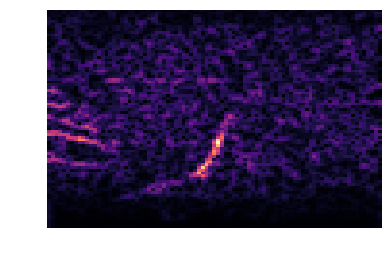

In [6]:
import librosa
import librosa.display

y, sr = librosa.load(file + audio_file, duration=2)
# ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
ps = librosa.core.stft(y=y)
# print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.axis('off')
a = plt.ylim(ymax = 256)

In [58]:
data

array([ 179, -429, -434, ..., -172, -145, -137], dtype=int16)

In [7]:
plt.show(librosa.feature.melspectrogram(y=y))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

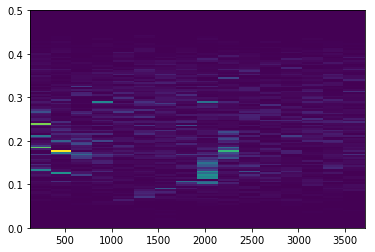

In [48]:
import scipy.signal as signal

f, t, sxx = signal.spectrogram(data)
aaa = plt.pcolormesh(t, f, sxx)

C:\Users\jorge\PycharmProjects\AudioExtraction\venv\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


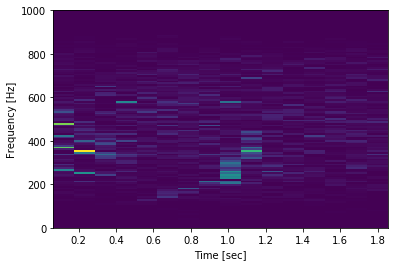

In [49]:
from scipy.io import wavfile
from scipy import signal
import numpy as np

# sample_rate, audio = wavfile.read(path_to_wav_file)

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)
f = aifc.open(file+audio_file, 'r')
nframes = f.getnframes()
strsig = f.readframes(nframes)
data = numpy.fromstring(strsig, numpy.short).byteswap()
# f.close()
sample_freq, segment_time, spec_data = log_specgram(data, f.getframerate())
sample_freq, segment_time, spec_data = signal.spectrogram(data, f.getframerate())  
plt.pcolormesh(segment_time, sample_freq, spec_data )
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()  

https://www.kaggle.com/timolee/audio-data-conversion-to-images-eda

In [15]:
sample_freq, segment_time, spectrogram = log_specgram(data, f.getframerate())
plt.imshow(spectrogram.T, aspect='auto', origin='lower')
plt.axis('off')

NameError: name 'log_specgram' is not defined

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


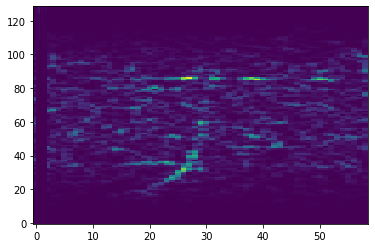

In [20]:
from matplotlib import mlab
import numpy as np

s = aifc.open(file+audio_file,'r')
nFrames = s.getnframes()
strSig = s.readframes(nFrames)
s = np.fromstring(strSig, np.short).byteswap()
params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
P, freqs, bins = mlab.specgram(s, **params)
plt.pcolormesh(bins, freqs, P)
plt.imshow(P, aspect='auto', origin='lower')

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/librosa/display.py:709: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


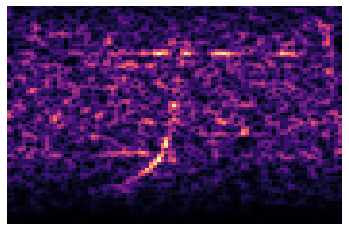

In [24]:
import librosa
import librosa.display

params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
P, freqs, bins = mlab.specgram(data, **params)

y, sr = librosa.load(file + audio_file, duration=2)
# ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
ps = librosa.core.stft(y=y)
# print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.axis('off')
a = plt.ylim(ymax = 256)

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


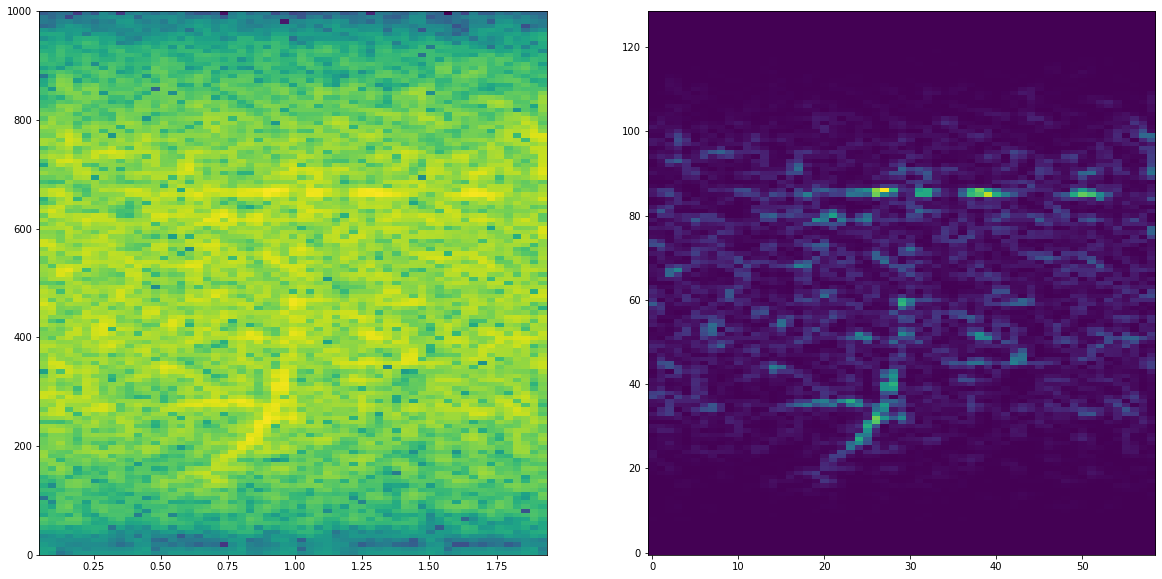

In [28]:
from matplotlib import mlab
import numpy as np

plt.figure(figsize=(20,10))
s = aifc.open(file+audio_file,'r')
nFrames = s.getnframes()
strSig = s.readframes(nFrames)
s = np.fromstring(strSig, np.short).byteswap()
params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
plt.subplot(1,2,1)
pxx, freqs, bins, im = plt.specgram(data, **params)
plt.subplot(1,2,2)
plt.imshow(pxx, aspect='auto', origin='lower')

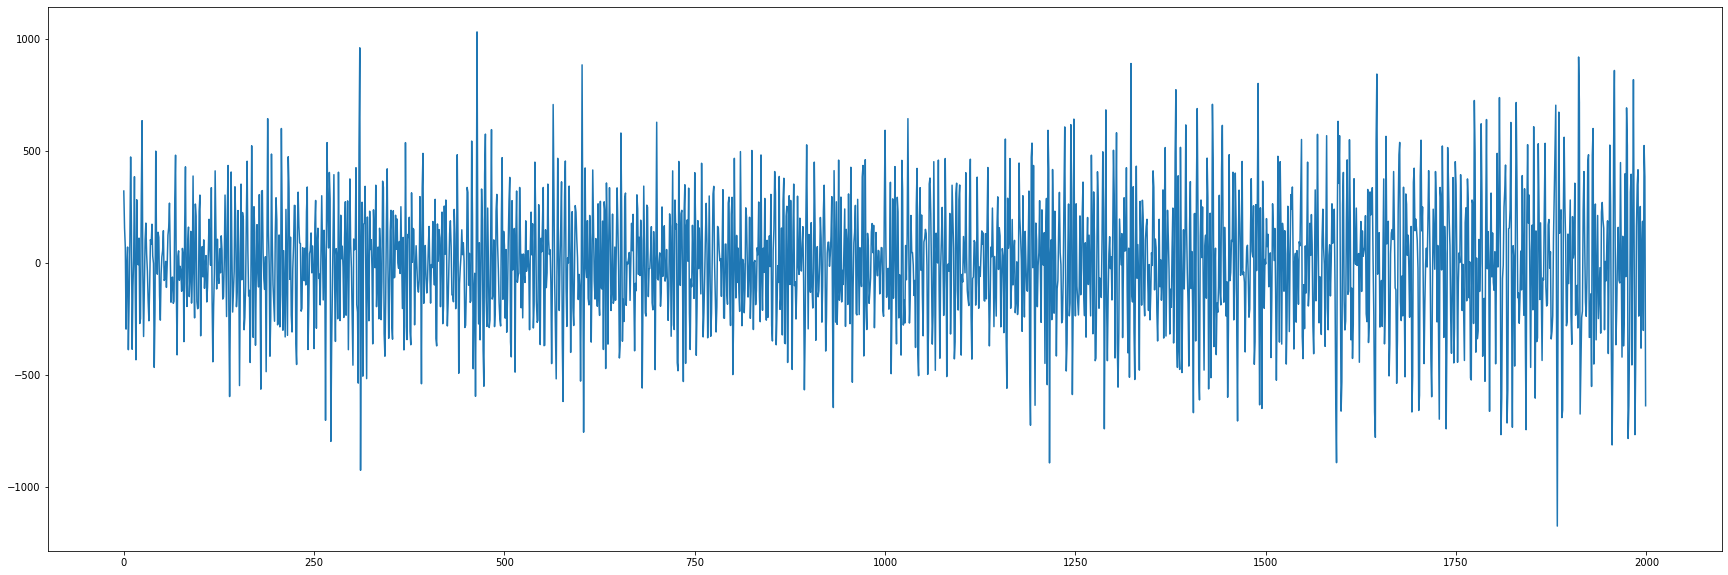

In [14]:
plt.figure(figsize=(30, 10))
plt.plot(data[:2000])

(0.032, 1.952, 0.0, 1000.0)

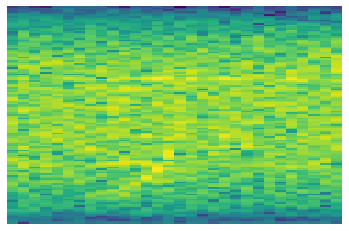

In [18]:
nfft = 256  # Length of the windowing segments
fs = 2000
noverlap = 128
# plt.figure(figsize=(20, 10))
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft))
plt.axis('off')


# Best Proves

In [2]:
# python basic pacakages
import aifc
import os
import datetime
import sys
from os import listdir
from os.path import isfile, join
import csv

# required packags
import librosa
import numpy as np
import pandas as pd

from matplotlib import mlab
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# my packages
from DataManager.Audio import *
from DataManager.General import *



In [3]:
labels_path = "data/train.csv"
train_path = "data/train"

audiofiles = [os.path.join(train_path, f) for f in listdir(train_path) if isfile(join(train_path, f))]
labels_dict = get_labels(labels_path)

In [4]:
n = 5
s = aifc.open(audiofiles[n], 'r')
framerate = s.getframerate()
nframes = s.getnframes()
strsig = s.readframes(nframes)
data = np.fromstring(strsig, np.short).byteswap()
labels_dict[audiofiles[n].split('/')[-1]], data[:30]

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


('0', array([  4,  -2,  -2,  -1, -10,  -5,  -6,  -5,   0,  -7,   0,  15,  -7,
          0,  10, -13, -14,   8,   7,   1,  12, -19, -19,  22,  -4,  -7,
         36, -33, -36,  22], dtype=int16))

In [5]:
framerate, nframes

(2000, 4000)

In [6]:
np.linspace(0, framerate/nframes, nframes).shape

(4000,)

In [27]:
audiofiles[:5]

['data/train/train20442.aiff',
 'data/train/train22387.aiff',
 'data/train/train11653.aiff',
 'data/train/train3672.aiff',
 'data/train/train27628.aiff']

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


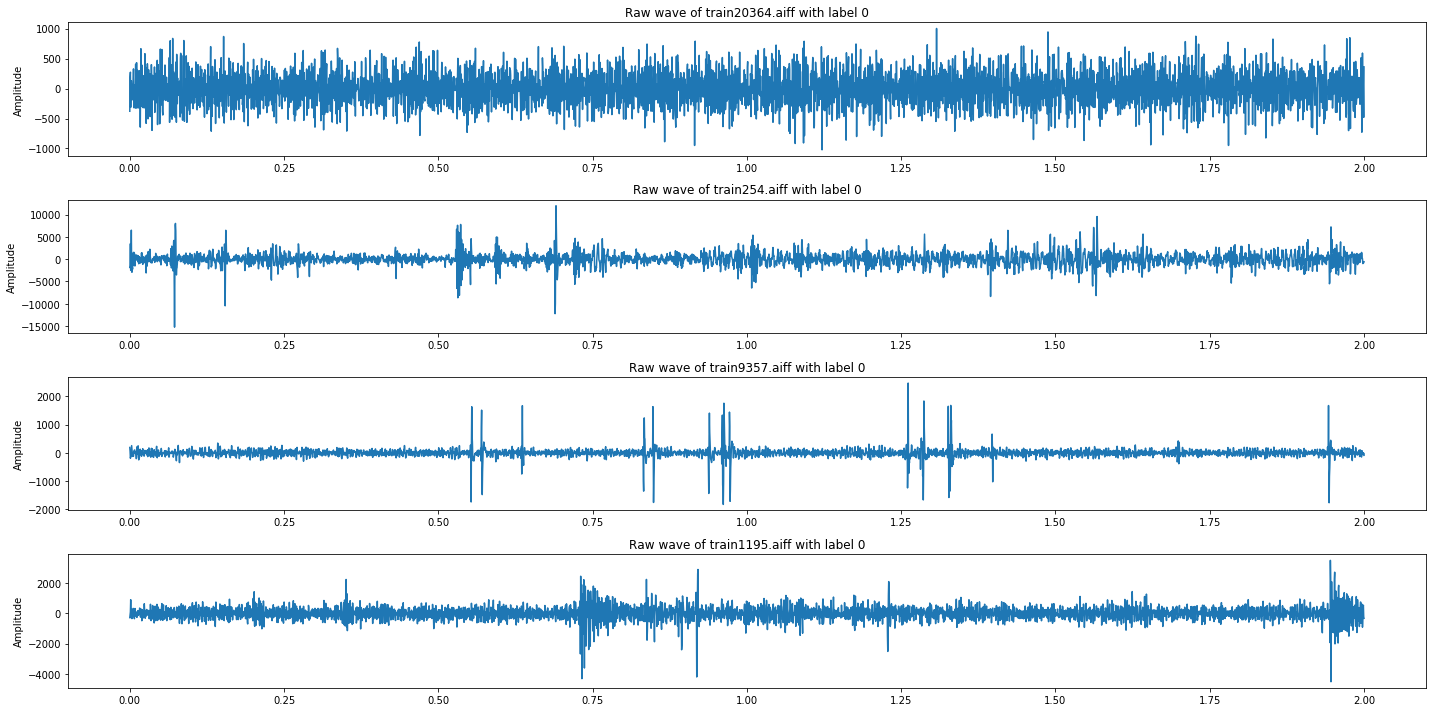

In [7]:
fig = plt.figure(figsize=(20, 10))

n=4

for i, fn in enumerate(audiofiles[:n]):
    s = aifc.open(fn, 'r')
    
    framerate = s.getframerate()
    nframes = s.getnframes()
    strsig = s.readframes(nframes)
    data = np.fromstring(strsig, np.short).byteswap()
    
    ax = fig.add_subplot(n, 1, i+1)
    ax.set_title('Raw wave of ' + fn.split('/')[-1] + ' with label %s' % labels_dict[fn.split('/')[-1]])
    ax.set_ylabel('Amplitude')
    ax.plot(np.linspace(0, nframes/framerate, nframes), data)
fig.tight_layout()
plt.savefig('wave_example.png')

In [11]:
from playsound import playsound
playsound(fn)

ModuleNotFoundError: No module named 'playsound'

In [ ]:


# this is a wrapper that take a filename and publish an html <audio> tag to listen to it

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """
    %(filepath)
    display(HTML(src))

## some consstant for our audio file 

rate = 44100 #44.1 khz
duration =5 # in sec

# this will give us sin with the righ amplitude to use with wav files
normedsin = lambda f,t : 2**13*sin(2*pi*f*t)

time = np.linspace(0,duration, num=rate*duration)
    
# define A as a 440 Hz sin function 
la    = lambda t : normedsin(440,t)

# look at it on the first 25 ms
plot(time[0:1000], la(time)[0:1000])

# write the file on disk, and show in in a Html 5 audio player
wavfile.write('440.wav', rate, la(time).astype(np.int16))
wavPlayer("440.wav")

In [ ]:
'http://dkopczyk.quantee.co.uk/speech-nn/'